## 问卷数据

In [2]:
import pandas as pd
import numpy as np

scale = pd.read_csv("./scale_origin.csv")
from scipy import stats
round_0 = scale[scale["task_round"] == 0].drop(["subject_id", "task_round"], axis=1)
round_1 = scale[scale["task_round"] == 1].drop(["subject_id", "task_round"], axis=1)
round_0_mean = round_0.mean()
round_0_std = round_0.std()
round_0_std_error = round_0_std / np.sqrt(len(round_0))
round_0_99 = stats.t.interval(0.99, len(round_0)-1, loc=round_0_mean, scale=round_0_std_error)
round_0_99_diff = (round_0_99[1] - round_0_99[0])/2
round_1_mean = round_1.mean()
round_1_std = round_1.std()
round_1_std_error = round_1_std / np.sqrt(len(round_1))
round_1_99 = stats.t.interval(0.99, len(round_1)-1, loc=round_1_mean, scale=round_1_std_error)
round_1_99_diff = (round_1_99[1] - round_1_99[0])/2


In [5]:
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(["light","no-latex"])
plt.rcParams ['font.sans-serif'] = ['Arial Unicode MS']  # 汉字显示

plt.rcParams.update({
    "font.family": "sans-serif",   # specify font family here
    "font.size":16})          # specify font size here


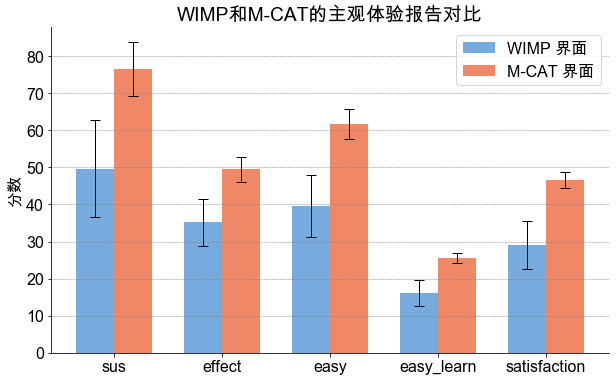

In [6]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(round_0_mean.index))
width = 0.35
ax.bar(x - width/2,round_0_mean, width, yerr=round_0_99_diff, label="WIMP 界面",error_kw=dict(ecolor='black', lw=1, capsize=5, capthick=1))
ax.bar(x + width/2, round_1_mean, width, yerr=round_1_99_diff, label="M-CAT 界面",error_kw=dict(ecolor='black', lw=1, capsize=5, capthick=1))

ax.set_ylabel("分数")
ax.set_xticks(x)
ax.set_xticklabels(round_0_mean.index)
ax.set_title("WIMP和M-CAT的主观体验报告对比")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_facecolor((1,1,1, 0))
ax.grid(axis='y', color='gray', linestyle='--', linewidth=0.5)
ax.legend()
fig.set_facecolor("white")
plt.show()